In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import os
from pandas import json_normalize
from scipy import stats
from scipy.signal import savgol_filter

In [42]:
df = pd.read_csv("C:/Users/user/Desktop/GA4_project/preproccessed_df.csv")

# 시간 단위 컬럼으로 변환
df['utc_time'] = pd.to_datetime(df['utc_time'])

df.head(3)

C:\Users\user\AppData\Local\Temp\ipykernel_14148\477848715.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/user/Desktop/GA4_project/preproccessed_df.csv")


,fullVisitorId,visitStartTime,channelGrouping,continent,subContinent,country,city,visits,pageviews,hits,...,bounces,transactionRevenue,campaign,source,medium,keyword,browser,operatingSystem,deviceCategory,utc_time
0,1131660440785968503,1472830385,Organic Search,Asia,Western Asia,Turkey,Izmir,1,1,1,...,1,0,(not set),google,organic,(not provided),Chrome,Windows,desktop,2016-09-02 15:33:05+00:00
1,377306020877927890,1472880147,Organic Search,Oceania,Australasia,Australia,not available in demo dataset,1,1,1,...,1,0,(not set),google,organic,(not provided),Firefox,Macintosh,desktop,2016-09-03 05:22:27+00:00
2,3895546263509774583,1472865386,Organic Search,Europe,Southern Europe,Spain,Madrid,1,1,1,...,1,0,(not set),google,organic,(not provided),Chrome,Windows,desktop,2016-09-03 01:16:26+00:00


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   fullVisitorId       903653 non-null  object             
 1   visitStartTime      903653 non-null  int64              
 2   channelGrouping     903653 non-null  object             
 3   continent           903653 non-null  object             
 4   subContinent        903653 non-null  object             
 5   country             903653 non-null  object             
 6   city                903653 non-null  object             
 7   visits              903653 non-null  int64              
 8   pageviews           903653 non-null  int64              
 9   hits                903653 non-null  int64              
 10  newVisits           903653 non-null  int64              
 11  bounces             903653 non-null  int64              
 12  transactionReven

In [44]:
# transaction revenue 컬럼이 0이면 0, 0을 초과하면 1로 표시되는 새로운 컬럼 추가(revenue_occurred)
df['revenue_occurred'] = np.where(df['transactionRevenue'] == 0, 0, 1)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   fullVisitorId       903653 non-null  object             
 1   visitStartTime      903653 non-null  int64              
 2   channelGrouping     903653 non-null  object             
 3   continent           903653 non-null  object             
 4   subContinent        903653 non-null  object             
 5   country             903653 non-null  object             
 6   city                903653 non-null  object             
 7   visits              903653 non-null  int64              
 8   pageviews           903653 non-null  int64              
 9   hits                903653 non-null  int64              
 10  newVisits           903653 non-null  int64              
 11  bounces             903653 non-null  int64              
 12  transactionReven

- revenue 가 발생한 접속 세션 데이터와 발생하지 않은 접속 세션 데이터를 분류, 각각 테이블 생성

In [46]:
# revenue_occurred가 0인 데이터만 추출
df_revenue_0 = df[df['revenue_occurred'] == 0]

# revenue_occurred가 1인 데이터만 추출
df_revenue_1 = df[df['revenue_occurred'] == 1]

In [47]:
# 각각의 테이블 데이터 갯수 확인
print(len(df))

print(len(df_revenue_0))

print(len(df_revenue_1))

903653
892138
11515


C:\Users\user\AppData\Local\Temp\ipykernel_14148\2895395780.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_revenue_0['date'] = df_revenue_0['utc_time'].dt.date
C:\Users\user\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51217 (\N{HANGUL SYLLABLE JEOB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current

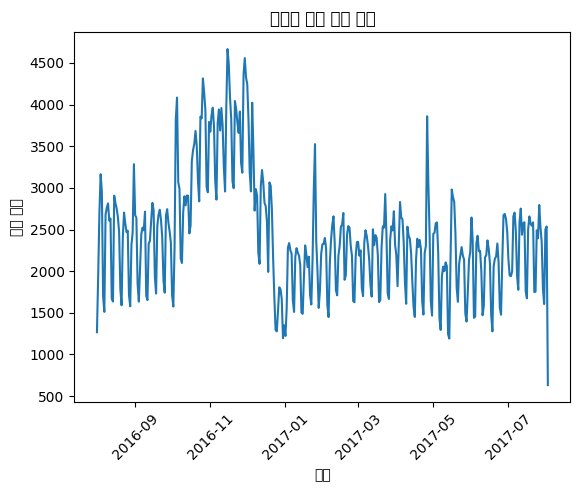

In [62]:
# date_revenue_0 의 DAU 그래프
import pandas as pd
import matplotlib.pyplot as plt

# 'utc_time' 컬럼에서 날짜를 추출하여 새로운 컬럼 추가
df_revenue_0['date'] = df_revenue_0['utc_time'].dt.date

# 날짜별 접속 빈도 계산
date_counts_revenue_0 = df_revenue_0['date'].value_counts().sort_index()

# 선 그래프 그리기
plt.plot(date_counts_revenue_0.index, date_counts_revenue_0.values)
plt.title('날짜별 접속 빈도 분포')
plt.xlabel('날짜')
plt.ylabel('접속 빈도')
plt.xticks(rotation=45)
plt.show()

- Savitzky-Golay 필터를 이용해 그래프의 중간 부분을 이어서 부드러운 선 그래프 생성

C:\Users\user\AppData\Local\Temp\ipykernel_14148\2460403384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_revenue_0['utc_time'] = pd.to_datetime(df_revenue_0['utc_time'])
C:\Users\user\AppData\Local\Temp\ipykernel_14148\2460403384.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_revenue_0['date'] = df_revenue_0['utc_time'].dt.date


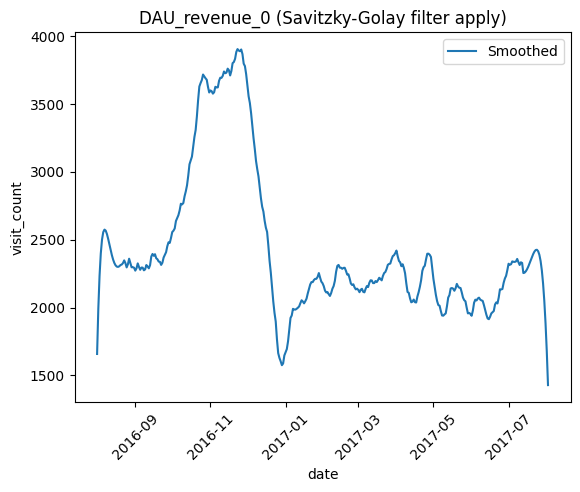

In [76]:
# 'utc_time' 컬럼을 datetime 형식으로 변환
df_revenue_0['utc_time'] = pd.to_datetime(df_revenue_0['utc_time'])

# 'utc_time' 컬럼에서 날짜를 추출하여 새로운 컬럼 추가
df_revenue_0['date'] = df_revenue_0['utc_time'].dt.date

# 날짜별 접속 빈도 계산
date_counts_revenue_0 = df_revenue_0['date'].value_counts().sort_index()

# Savitzky-Golay 필터 적용
smoothed_counts_revenue_0 = savgol_filter(date_counts_revenue_0.values, window_length=40, polyorder=5)

# 선 그래프 그리기
plt.plot(date_counts_revenue_0.index, smoothed_counts_revenue_0, label='Smoothed')
plt.title('DAU_revenue_0 (Savitzky-Golay filter apply)')
plt.xlabel('date')
plt.ylabel('visit_count')
plt.xticks(rotation=45)
plt.legend()
plt.show()


- 같은 방식으로 df_revenue_1 의 DAU 선그래프 생성

C:\Users\user\AppData\Local\Temp\ipykernel_14148\1306852783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_revenue_1['date'] = df_revenue_1['utc_time'].dt.date


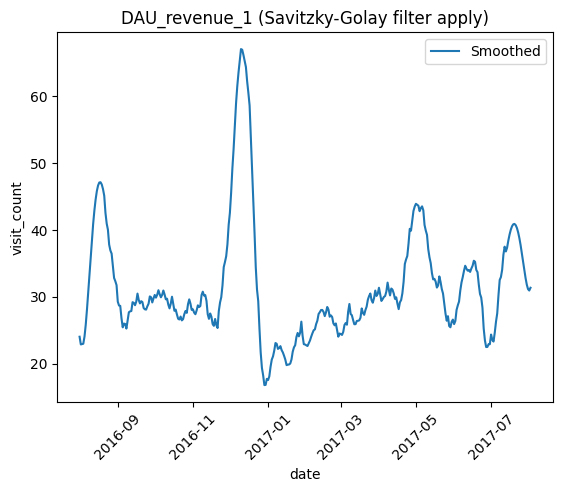

In [75]:
# 'utc_time' 컬럼에서 날짜를 추출하여 새로운 컬럼 추가
df_revenue_1['date'] = df_revenue_1['utc_time'].dt.date

# 날짜별 접속 빈도 계산
date_counts_revenue_1 = df_revenue_1['date'].value_counts().sort_index()

# Savitzky-Golay 필터 적용
smoothed_counts_revenue_1 = savgol_filter(date_counts_revenue_1.values, window_length=40, polyorder=5)

# 선 그래프 그리기
plt.plot(date_counts_revenue_1.index, smoothed_counts_revenue_1, label='Smoothed')
plt.title('DAU_revenue_1 (Savitzky-Golay filter apply)')
plt.xlabel('date')
plt.ylabel('visit_count')
plt.xticks(rotation=45)
plt.legend()
plt.show()